<a href="https://colab.research.google.com/github/Pravallika-02-datascience/Internship/blob/main/Mainflowintern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 **

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#step 1 : load the data set
student=pd.read_csv("/content/student-mat.csv")

In [5]:
#load the data into a dataframe
student=pd.read_csv("/content/student-mat.csv",sep=";")
print("DATA LOADED SUCCESSFULLY ")

DATA LOADED SUCCESSFULLY 


In [6]:
#Data Exploration
print(student.head())
print(student.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [7]:
#step 3
 #data cleaning
print(student.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [8]:
#remove duplicates
student=(student.drop_duplicates())

In [9]:
#Step  4
#data analysis

#average score in math?
avg_score=student['G3'].mean()
print("Average score in maths :",avg_score)
#students who score above 15 in the final grade
stu_above_15=len(student[student['G3']>15])
print("Students who scored above 15 : ",stu_above_15)
#corelation between study time and final grade
correlation=student['studytime'].corr(student['G3'])
print("correlation between study and grade ",correlation)
#which gender has highest avg final grade
gender=student.groupby('sex')['G3'].mean()
print("gender has highest avg final grade ",gender)


Average score in maths : 10.415189873417722
Students who scored above 15 :  40
correlation between study and grade  0.09781968965319626
gender has highest avg final grade  sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


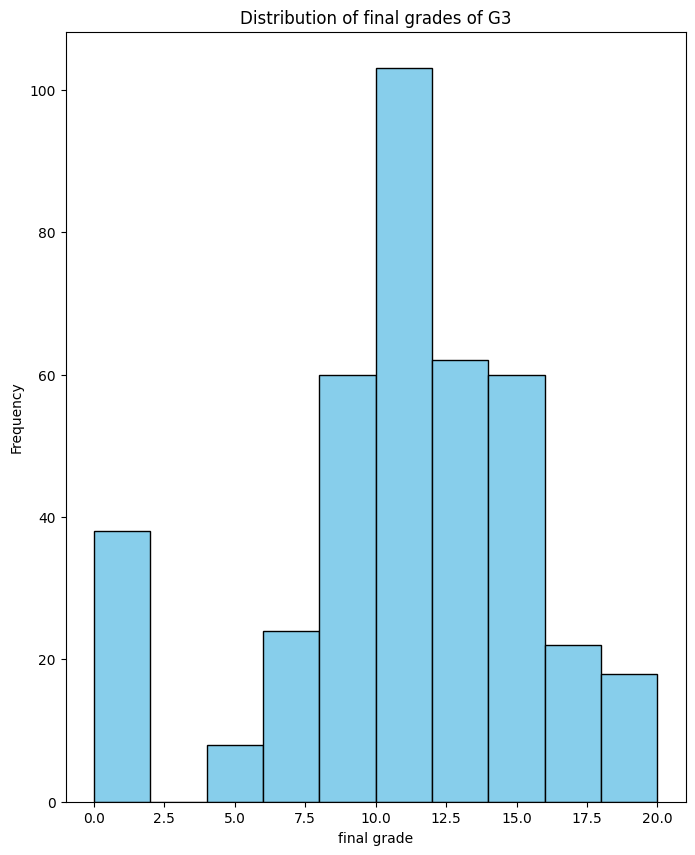

In [10]:
#step  5
#data visualization
#histogram of final grades
plt.figure(figsize=(8,10))
plt.hist(student['G3'],bins=10,color='skyblue',edgecolor='black')
plt.title("Distribution of final grades of G3")
plt.xlabel('final grade')
plt.ylabel('Frequency')
plt.show()

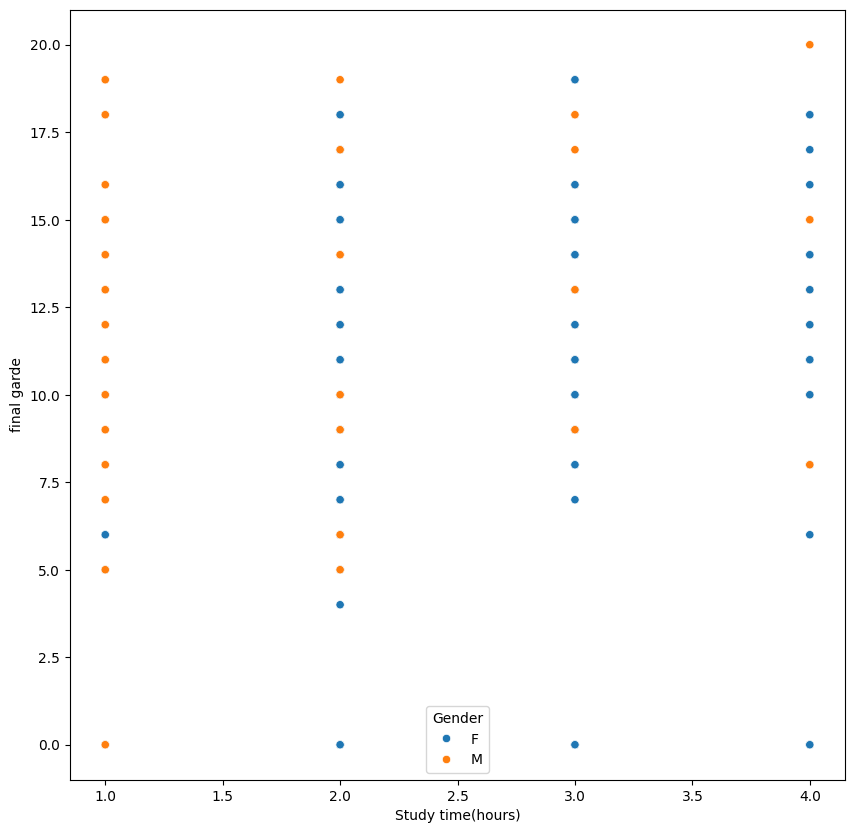

In [13]:
#scatterplot of study time vs final gade
plt.figure(figsize=(10,10))
sns.scatterplot(data=student,x='studytime',y='G3',hue='sex')
plt.title=("study time vs final grade")
plt.xlabel("Study time(hours)")
plt.ylabel("final garde")
plt.legend(title='Gender')
plt.show()

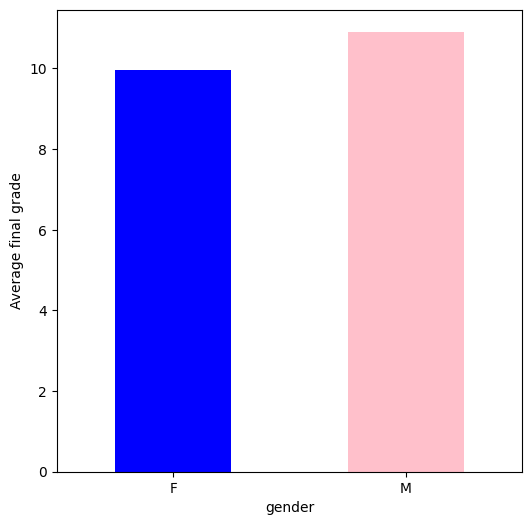

In [20]:
#Bar chart of average scores by gender
plt.figure(figsize=(6,6))
gender.plot(kind='bar',color=['blue','pink'])
plt.title=("Average final garde by gender")
plt.ylabel("Average final grade")
plt.xlabel("gender")
plt.xticks(rotation=1)
plt.show()